# **PROBLEM STATEMENT**

 The availability and accessibility of rental bikes in urban cities is important for enhancing mobility comfort, and it is necessary to provide a stable supply of rental bikes to the public at the right time to reduce waiting time. The key challenge is to predict the number of rental bikes required at each hour to ensure a stable supply of bikes.

# **Data Description**

1)Date = it contains date time



2)Rented Bike count =number of bikes rented

2)Hour = Hour of the day

3)Temperature=Temperature measure

4)Humidity =humidity measure

5)Windspeed =speed of wind

6)Visibility = visiblity of weather

7)Dew point temperature = dew present in environment over the time

8)Solar radiation = radiation coming from sun

9)Rainfall = rainfall measure

10)Snowfall = snowfall measure

11)Seasons = season at that time

12)Holiday = if it is holiday or not

13)Functional Day = if it is functional or non functional time

# **Github Link**
https://github.com/Kashfur/bike-sharing-demand

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing libraries**

In [ ]:
# Importing the libraries

import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
%matplotlib inline
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [ ]:
# reading data
bike_data_df=pd.read_csv('/content/drive/MyDrive/CODE/SeoulBikeData.csv',encoding= 'unicode_escape')

# **Loading Dataset**

In [ ]:
#head
bike_data_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# description of data
bike_data_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
#information of data
bike_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#rows and columns
bike_data_df.shape

(8760, 14)

In [ ]:
# checking for null values

bike_data_df.isnull().sum()


Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
#changing date format to date-time format

bike_data_df['Date'] = pd.to_datetime(bike_data_df['Date'])

<ipython-input-116-4f852c6d97a0>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  bike_data_df['Date'] = pd.to_datetime(bike_data_df['Date'])


In [ ]:
#TYPES OF SEASONS IN DATA
bike_data_df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [ ]:
# creating new dataframe

bike_new_df = bike_data_df.groupby('Seasons').sum()

<ipython-input-118-eff6c351a2f3>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bike_new_df = bike_data_df.groupby('Seasons').sum()


In [ ]:
bike_new_df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Seasons,,,,,,,,,,
Autumn,1790002,25116,30839.9,129355,3264.5,3408683,12009.2,1139.65,268.1,123.0
Spring,1611909,25392,28807.1,129779,4139.1,2738725,9097.1,1520.84,403.8,0.0
Summer,2283234,25392,58694.8,143479,3553.6,3315854,41400.3,1680.85,559.7,0.0
Winter,487169,24840,-5487.4,107449,4153.0,3123332,-26820.0,644.07,70.9,534.6


array([<Axes: ylabel='Rented Bike Count'>], dtype=object)

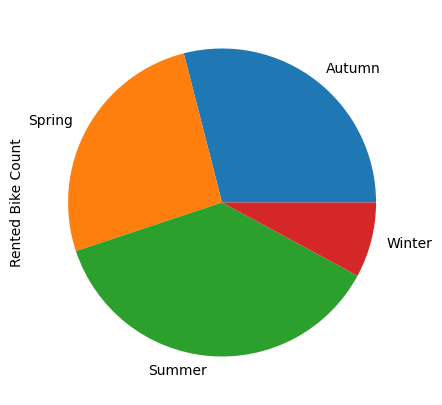

In [ ]:
# creating a pie chart for bike rented in different seasons

bike_new_df['Rented Bike Count'].plot(kind='pie', subplots=True, figsize=(5, 5))

In [ ]:
#  rented bike counts in each seasaon
rented_bike_count_df = bike_new_df.groupby('Seasons').sum()['Rented Bike Count']

In [ ]:
rented_bike_count_df.head()

Seasons
Autumn    1790002
Spring    1611909
Summer    2283234
Winter     487169
Name: Rented Bike Count, dtype: int64

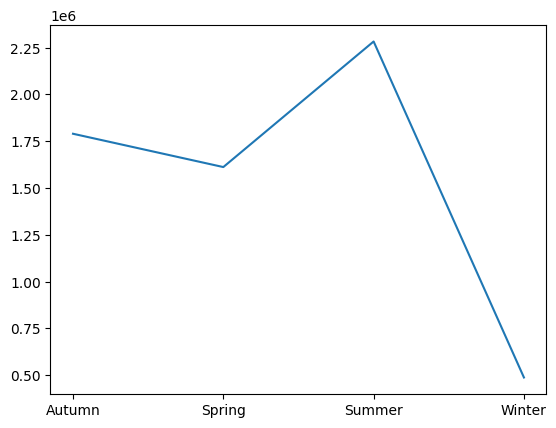

In [ ]:
#line plot

plt.plot(rented_bike_count_df)
plt.show()

In [ ]:
#bikes rented each holiday or not holiday
bikes_df=bike_data_df.groupby('Holiday').sum()['Rented Bike Count']


<ipython-input-124-f7c754aa9809>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bikes_df=bike_data_df.groupby('Holiday').sum()['Rented Bike Count']


<Axes: xlabel='Holiday'>

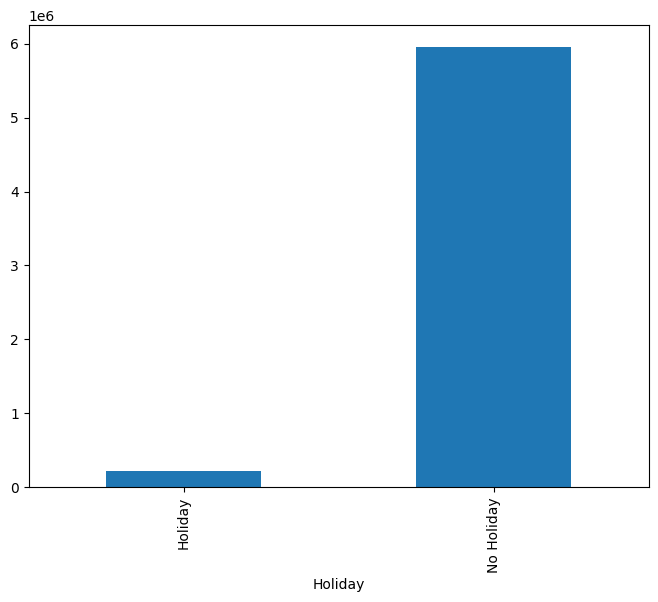

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
bikes_df.plot(kind='bar', ax=ax)

In [ ]:
# bikes rented in differant rainfall

bikes_rain_df =pd.DataFrame(bike_new_df.groupby('Rainfall(mm)')['Rented Bike Count'].sum())

In [ ]:
bikes_rain_df.reset_index(inplace=True)

In [ ]:
bikes_rain_df.head()

,Rainfall(mm),Rented Bike Count
0,70.9,487169
1,268.1,1790002
2,403.8,1611909
3,559.7,2283234


<ipython-input-129-b808844d42c4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bikes_rain_df['Rainfall(mm)'])


<Axes: xlabel='Rainfall(mm)', ylabel='Density'>

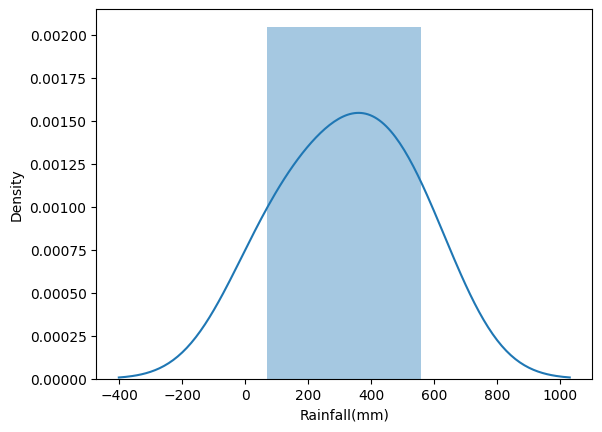

In [ ]:
#showing plot for  bikes rented in rainfall 

sns.distplot(bikes_rain_df['Rainfall(mm)'])


In [ ]:
# bikes rented in differant snowfall
bikes_snow_df =pd.DataFrame(bike_new_df.groupby('Snowfall (cm)')['Rented Bike Count'].sum())
bikes_snow_df.reset_index(inplace=True)

In [ ]:
bikes_snow_df.head()

,Snowfall (cm),Rented Bike Count
0,0.0,3895143
1,123.0,1790002
2,534.6,487169


<ipython-input-132-3c7987321d84>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bikes_snow_df['Snowfall (cm)'])


<Axes: xlabel='Snowfall (cm)', ylabel='Density'>

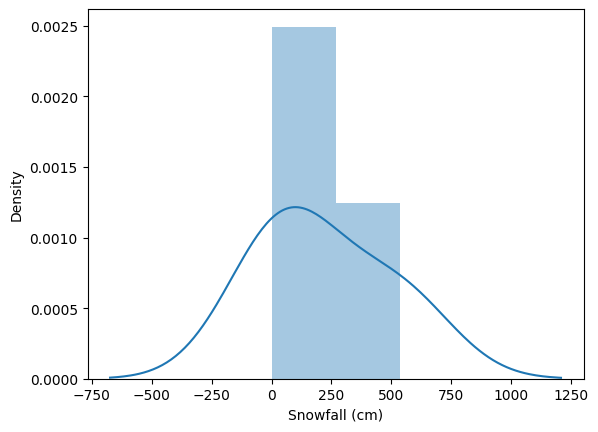

In [ ]:
#showing plot for  bikes rented in snowfall

sns.distplot(bikes_snow_df['Snowfall (cm)'])

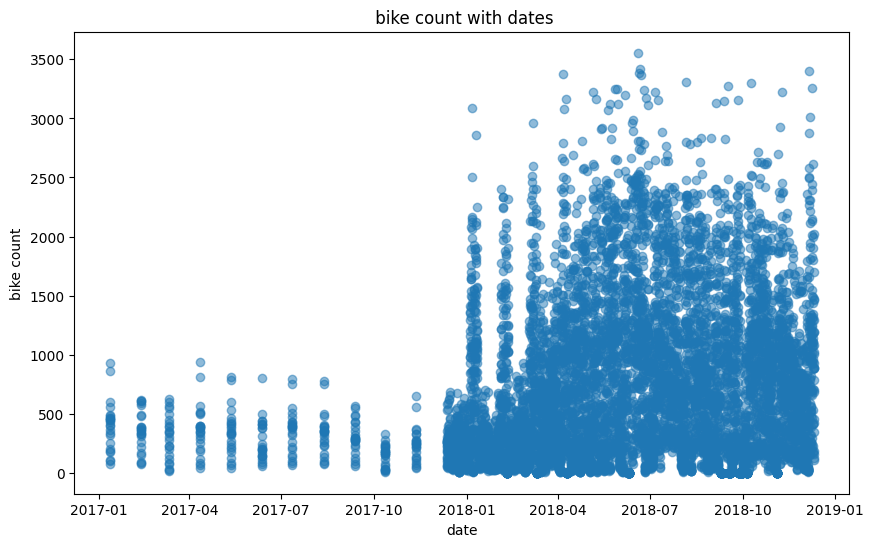

In [ ]:
# scatter plot of bike count based on dates

plt.figure(figsize=(10,6))
plt.scatter(bike_data_df['Date'], bike_data_df['Rented Bike Count'], alpha=0.5)
plt.title(' bike count with dates')
plt.xlabel('date')
plt.ylabel('bike count')
plt.show()

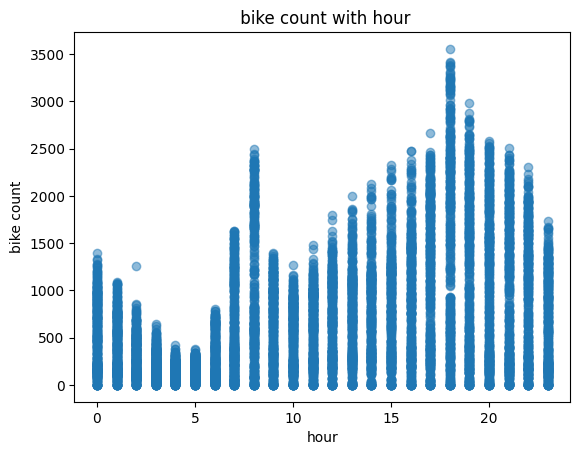

In [ ]:
# scatter plot of bike count most or least at what hour

plt.scatter(bike_data_df['Hour'], bike_data_df['Rented Bike Count'], alpha=0.5)
plt.title(' bike count with hour')
plt.xlabel('hour')
plt.ylabel('bike count')
plt.show()

In [ ]:
#The interquartile range  measure to helps us understand how spread out a set of data is.
Q1 = bike_data_df.quantile(0.25)
Q3 = bike_data_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rented Bike Count             874.25
Hour                           11.50
Temperature(°C)                19.00
Humidity(%)                    32.00
Wind speed (m/s)                1.40
Visibility (10m)             1060.00
Dew point temperature(°C)      19.50
Solar Radiation (MJ/m2)         0.93
Rainfall(mm)                    0.00
Snowfall (cm)                   0.00
dtype: float64


<ipython-input-135-d8db6c763822>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = bike_data_df.quantile(0.25)
<ipython-input-135-d8db6c763822>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = bike_data_df.quantile(0.75)


In [ ]:


features = list(bike_data_df.columns)
features = features[2:]
listi = ['Hour','Holiday','Functioning Day','Seasons']
list_features = [x for x in features if x not in listi]

In [ ]:
list_features

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [ ]:
#  removing outliers

bike_data_df[list_features] = bike_data_df[list_features][~((bike_data_df[list_features] < (Q1 - 1.5 * IQR)) |(bike_data_df[list_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-138-0066a341271c>:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  bike_data_df[list_features] = bike_data_df[list_features][~((bike_data_df[list_features] < (Q1 - 1.5 * IQR)) |(bike_data_df[list_features] > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-138-0066a341271c>:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  bike_data_df[list_features] = bike_data_df[list_features][~((bike_data_df[list_features] < (Q1 - 1.5 * IQR)) |(bike_data_df[list_features] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
#checking null values if any

bike_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            7078 non-null   float64       
 4   Humidity(%)                7078 non-null   float64       
 5   Wind speed (m/s)           7078 non-null   float64       
 6   Visibility (10m)           7078 non-null   float64       
 7   Dew point temperature(°C)  7078 non-null   float64       
 8   Solar Radiation (MJ/m2)    7078 non-null   float64       
 9   Rainfall(mm)               7078 non-null   float64       
 10  Snowfall (cm)              7078 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
#filling null values with mean
bike_data_df['Temperature(°C)'] = bike_data_df['Temperature(°C)'].fillna(bike_data_df['Temperature(°C)'].mean())
bike_data_df['Humidity(%)'] = bike_data_df['Humidity(%)'].fillna(bike_data_df['Humidity(%)'].mean())
bike_data_df['Wind speed (m/s)'] = bike_data_df['Wind speed (m/s)'].fillna(bike_data_df['Wind speed (m/s)'].mean())
bike_data_df['Visibility (10m)'] = bike_data_df['Visibility (10m)'].fillna(bike_data_df['Visibility (10m)'].mean())
bike_data_df['Dew point temperature(°C)'] = bike_data_df['Dew point temperature(°C)'].fillna(bike_data_df['Dew point temperature(°C)'].mean())
bike_data_df['Solar Radiation (MJ/m2)'] = bike_data_df['Solar Radiation (MJ/m2)'].fillna(bike_data_df['Solar Radiation (MJ/m2)'].mean())
bike_data_df['Rainfall(mm)'] = bike_data_df['Rainfall(mm)'].fillna(bike_data_df['Rainfall(mm)'].mean())
bike_data_df['Snowfall (cm)'] = bike_data_df['Snowfall (cm)'].fillna(bike_data_df['Snowfall (cm)'].mean())

In [ ]:
bike_data_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#dropping rainfall and snowfall column
bike_data_df.drop(columns=['Rainfall(mm)','Snowfall (cm)'],axis=1,inplace=True)

<ipython-input-143-62fe8a0bb95f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bike_data_df.corr('pearson'),vmin=-1, vmax=1,cmap='BuPu',annot=True, square=True)


<Axes: >

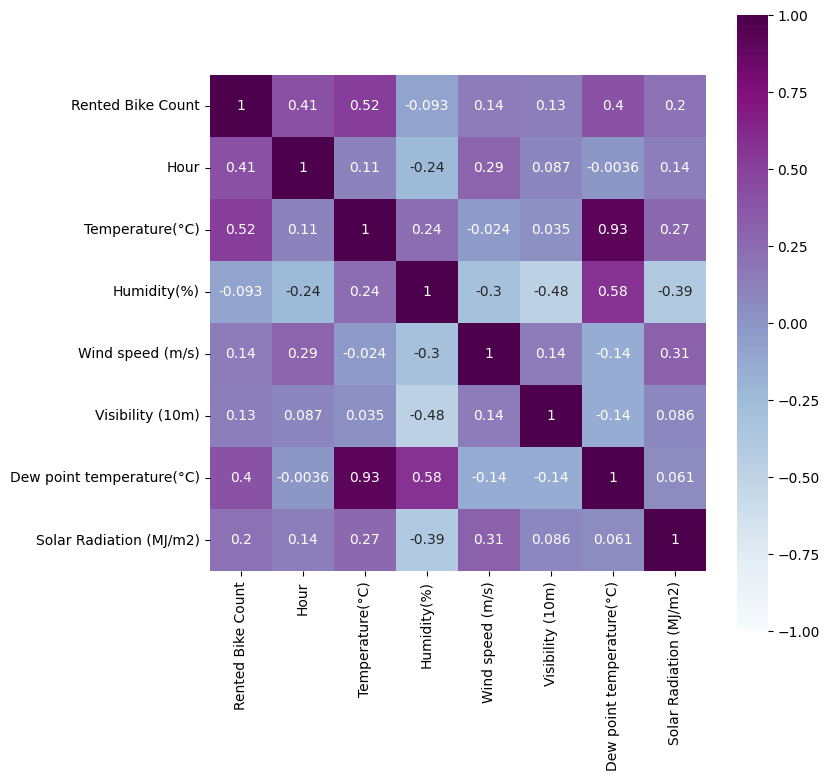

In [ ]:
#correlation heatmap
plt.figure(figsize=(8,8))
sns.heatmap(bike_data_df.corr('pearson'),vmin=-1, vmax=1,cmap='BuPu',annot=True, square=True)

In [ ]:
#calculate Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(bike_data_df[[i for i in bike_data_df.describe().columns if i not in ['Rented Bike Count','Date']]])

,variables,VIF
0,Hour,4.416438
1,Temperature(°C),34.863158
2,Humidity(%),6.285507
3,Wind speed (m/s),5.848913
4,Visibility (10m),11.292024
5,Dew point temperature(°C),16.242883
6,Solar Radiation (MJ/m2),2.464537


In [ ]:
#removing Temperature(C) as it has high vif value

bike_data_df.drop(columns=['Temperature(°C)'],axis=1 , inplace= True)

In [ ]:
calc_vif(bike_data_df[[i for i in bike_data_df.describe().columns if i not in ['Rented Bike Count','Date']]])


,variables,VIF
0,Hour,3.921714
1,Humidity(%),6.170766
2,Wind speed (m/s),5.692080
3,Visibility (10m),6.056347
4,Dew point temperature(°C),1.529196
5,Solar Radiation (MJ/m2),1.838417


In [ ]:
bike_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Humidity(%)                8760 non-null   float64       
 4   Wind speed (m/s)           8760 non-null   float64       
 5   Visibility (10m)           8760 non-null   float64       
 6   Dew point temperature(°C)  8760 non-null   float64       
 7   Solar Radiation (MJ/m2)    8760 non-null   float64       
 8   Seasons                    8760 non-null   object        
 9   Holiday                    8760 non-null   object        
 10  Functioning Day            8760 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 7

TypeError: ignored

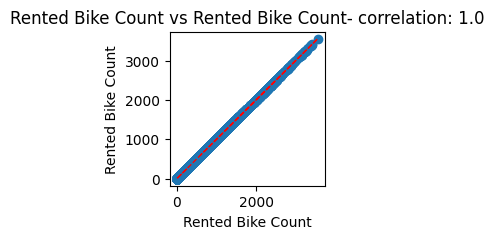

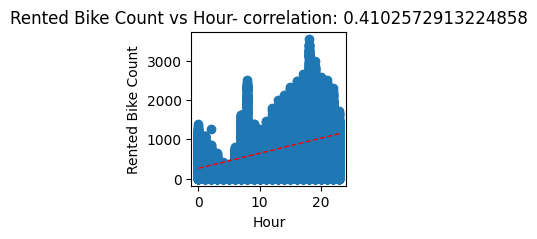

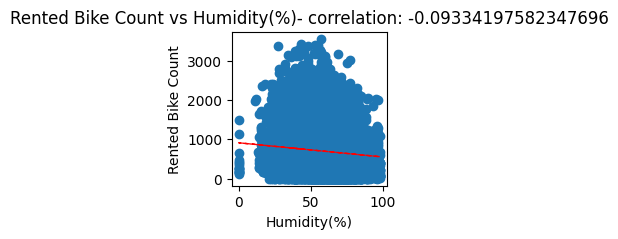

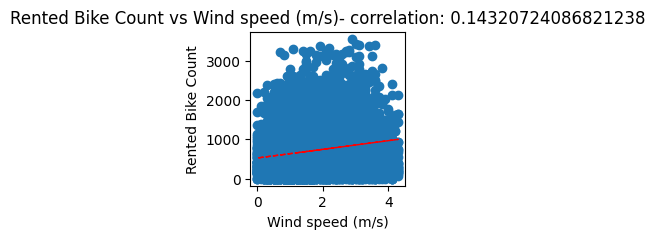

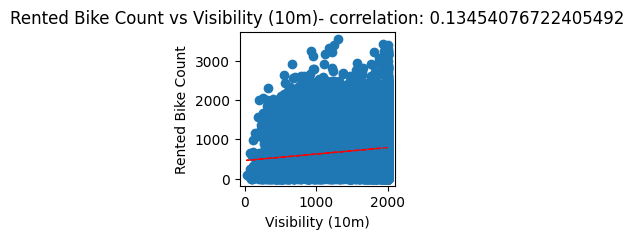

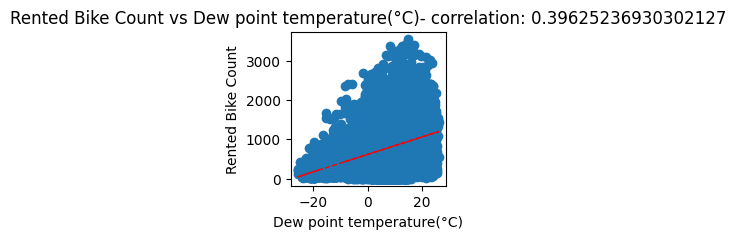

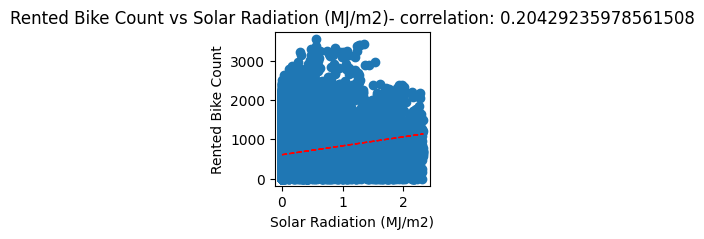

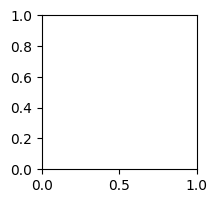

In [ ]:
# correlation  between dependent and independent variables
numeric_features = bike_data_df.columns
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(2, 2))
    ax = fig.gca()
    feature =  bike_data_df[col]
    label =  bike_data_df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit( bike_data_df[col],  bike_data_df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)( bike_data_df[col])

    plt.plot( bike_data_df[col], y_hat, "r--", lw=1)

plt.show()

# **MODELING DATA**

In [ ]:
# Creating independent variables
Y = bike_data_df['Rented Bike Count']

# Creating dependent variable 
X = bike_data_df.drop(columns=['Rented Bike Count','Seasons','Holiday','Functioning Day','Date'],axis=1).values

In [ ]:
X

array([[ 0.000e+00,  3.700e+01,  2.200e+00,  2.000e+03, -1.760e+01,
         0.000e+00],
       [ 1.000e+00,  3.800e+01,  8.000e-01,  2.000e+03, -1.760e+01,
         0.000e+00],
       [ 2.000e+00,  3.900e+01,  1.000e+00,  2.000e+03, -1.770e+01,
         0.000e+00],
       ...,
       [ 2.100e+01,  3.900e+01,  3.000e-01,  1.968e+03, -9.900e+00,
         0.000e+00],
       [ 2.200e+01,  4.100e+01,  1.000e+00,  1.859e+03, -9.800e+00,
         0.000e+00],
       [ 2.300e+01,  4.300e+01,  1.300e+00,  1.909e+03, -9.300e+00,
         0.000e+00]])

In [ ]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
# Transforming data

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Linear regression**

In [ ]:
# Fitting Multiple Linear Regression to the Training set

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

In [ ]:
# Predicting the Train set results

Y_pred_train = regressor.predict(X_train)

In [ ]:
# Predicting the Test set results

Y_pred_test = regressor.predict(X_test)

In [ ]:
# r2 score of train set

r2_linear_train = r2_score(Y_train, Y_pred_train)

In [ ]:
r2_linear_train

0.4109991816286487

In [ ]:
r2_linear_test = r2_score(Y_test, Y_pred_test)

In [ ]:
#metrics 

MSE  = mean_squared_error(Y_test,Y_pred_test)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_linear_test = r2_score(Y_test,Y_pred_test)
print("R2 :" ,r2_linear_test)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 248542.16517018538
RMSE : 498.5400336684963
R2 : 0.4061439644438899
Adjusted R2 :  0.40410205257378284


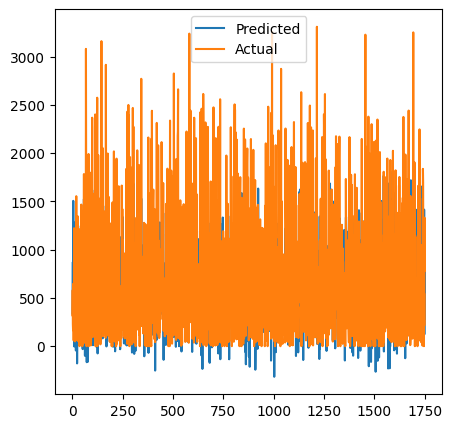

In [ ]:
# plotting results

plt.figure(figsize=(6,5))
plt.plot((Y_pred_test))
plt.plot(np.array((Y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **Decision-tree regression**

In [ ]:
# training
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
decisionTree = DecisionTreeRegressor()

param = {'max_depth' : [1,4,5,6,7,10,15,20,8]}

gridSearch_decisionTree=GridSearchCV(decisionTree,param,scoring='r2',cv=6)
gridSearch_decisionTree.fit(X_train,Y_train)


best_DecisionTree=gridSearch_decisionTree.best_estimator_
bestDecisionTree_testScore=best_DecisionTree.score(X_test,Y_test)
r2_decision_test = best_DecisionTree.score(X_test,Y_test)

In [ ]:
# extracting  parameters

print(f"The best Decision Tree R2 score is {gridSearch_decisionTree.best_score_} with max depth {gridSearch_decisionTree.best_params_['max_depth']}")
print('\n')
print(f"The best R2 test score is : {bestDecisionTree_testScore} with max depth = {gridSearch_decisionTree.best_params_['max_depth']}")

The best Decision Tree R2 score is 0.6270901531044516 with max depth 7


The best R2 test score is : 0.6162079163014188 with max depth = 7


# **RESULT**

In [ ]:
# creating a list of  model names

model_list =['Linear regression','Decision Tree Regressor']
#creating a list of r2 score
Result = [r2_linear_test,r2_decision_test]

In [ ]:
results = pd.DataFrame()

In [ ]:
results['model name'] = model_list
results['R2-score'] = Result

In [ ]:
results

,model name,R2-score
0,Linear regression,0.406144
1,Decision Tree Regressor,0.616208


# **Conclusion**





*   Decision Tree Regressor is better than linear Regression in this model

*   We are able to extract information and come to necessary information using Explotary data analysis






